In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 효과_naver_blog_953.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
data=data.replace('\n','')
for i in range(1,953):
    x="naver_blog_"+str(i)
    data=data.replace(x,"\n\n"+x+"  "+"\n")
f = open('전자담배 효과_naver_blog_953.txt', 'w', encoding='utf-8')
f.write(data)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
openFileName = '전자담배 효과_naver_blog_953.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [5]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 10574)	1
  (1, 14360)	1
  (2, 4281)	1
  (3, 5912)	1
  (4, 8595)	1
  (5, 10574)	1
  (6, 7358)	1
  (7, 8156)	1
  (8, 8736)	1
  (9, 13247)	1
  (10, 9709)	1
  (11, 1970)	1
  (12, 10236)	1
  (13, 14156)	1
  (14, 5673)	1
  (15, 4826)	1
  (16, 8595)	1
  (17, 5969)	1
  (18, 11087)	1
  (19, 11579)	1
  (20, 8595)	1
  (21, 468)	1
  (22, 5235)	1
  (23, 92)	1
  (24, 3205)	1
  :	:
  (236556, 7342)	1
  (236557, 10362)	1
  (236558, 6459)	1
  (236559, 11265)	1
  (236560, 10574)	1
  (236561, 6453)	1
  (236562, 1593)	1
  (236563, 2639)	1
  (236564, 6453)	1
  (236565, 4353)	1
  (236566, 3242)	1
  (236567, 1511)	1
  (236568, 6453)	1
  (236569, 4306)	1
  (236570, 9550)	1
  (236571, 3638)	1
  (236572, 2804)	1
  (236573, 10531)	1
  (236574, 6141)	1
  (236575, 2636)	1
  (236576, 10727)	1
  (236577, 7872)	1
  (236578, 14182)	1
  (236579, 14270)	1
  (236580, 9677)	1


In [8]:
print(vectorize.vocabulary_)

{'전자담배': 10574, '효과': 14360, '무엇': 4281, '사람': 5912, '연초': 8595, '시작': 7358, '얘기': 8156, '오늘': 8736, '포스팅': 13247, '이야기': 9709, '내용': 1970, '작성': 10236, '혹시': 14156, '블로그': 5673, '방문': 4826, '사용': 5969, '주위': 11087, '차라리': 11579, '건강': 468, '보신': 5235, '가요': 92, '또한': 3205, '이제': 9754, '듣기': 3065, '생각': 6268, '대한': 2636, '이유': 9733, '지금': 11265, '우선': 9081, '가장': 106, '기본': 1542, '목적': 4177, '대용': 2582, '해도': 13839, '과언': 970, '사실': 5956, '아시': 7763, '니코틴': 2246, '패치': 13069, '대체': 2610, '수단': 6857, '금연': 1466, '제일': 10847, '전담': 10513, '흡입': 14480, '방식': 4841, '외형': 8955, '심리': 7585, '안정감': 7920, '무화량': 4328, '중독': 11170, '물질': 4397, '때문': 3183, '머리': 3925, '계속': 689, '경우': 649, '여기': 8426, '정말': 10719, '가지': 122, '화학물질': 14253, '발생': 4771, '발암': 4774, '인체': 9903, '여가': 8419, '지나': 11270, '반면': 4688, '과연': 971, '전체': 10596, '비교': 5685, '부재': 5450, '다시': 2306, '불상': 5578, '사가': 5879, '정도': 10709, '결과': 581, '나머지': 1802, '무시': 4275, '영향': 8684, '성분': 6517, '더욱': 2668, '부분': 5405, '이지': 

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'전자담배': 12249,
 '효과': 1879,
 '무엇': 189,
 '사람': 1012,
 '연초': 1030,
 '시작': 517,
 '얘기': 59,
 '오늘': 603,
 '포스팅': 310,
 '이야기': 244,
 '내용': 226,
 '작성': 54,
 '혹시': 124,
 '블로그': 106,
 '방문': 266,
 '사용': 3505,
 '주위': 106,
 '차라리': 31,
 '건강': 610,
 '보신': 43,
 '가요': 49,
 '또한': 506,
 '이제': 401,
 '듣기': 2,
 '생각': 1445,
 '대한': 560,
 '이유': 377,
 '지금': 457,
 '우선': 141,
 '가장': 699,
 '기본': 210,
 '목적': 96,
 '대용': 16,
 '해도': 140,
 '과언': 9,
 '사실': 465,
 '아시': 49,
 '니코틴': 2271,
 '패치': 191,
 '대체': 140,
 '수단': 63,
 '금연': 3929,
 '제일': 149,
 '전담': 231,
 '흡입': 630,
 '방식': 440,
 '외형': 14,
 '심리': 17,
 '안정감': 7,
 '무화량': 237,
 '중독': 282,
 '물질': 712,
 '때문': 1537,
 '머리': 75,
 '계속': 267,
 '경우': 945,
 '여기': 259,
 '정말': 846,
 '가지': 939,
 '화학물질': 64,
 '발생': 279,
 '발암': 261,
 '인체': 137,
 '여가': 9,
 '지나': 17,
 '반면': 64,
 '과연': 79,
 '전체': 122,
 '비교': 337,
 '부재': 7,
 '다시': 380,
 '불상': 3,
 '사가': 10,
 '정도': 898,
 '결과': 535,
 '나머지': 30,
 '무시': 33,
 '영향': 205,
 '성분': 342,
 '더욱': 234,
 '부분': 807,
 '이지': 40,
 '어째서': 1,
 '정지': 4,
 '면서'

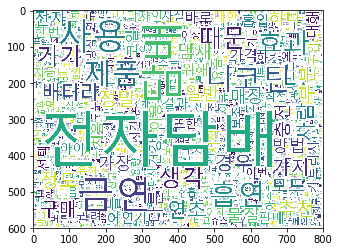

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'전자담배': 10574, '효과': 14360, '무엇': 4281, '사람': 5912, '연초': 8595, '시작': 7358, '얘기': 8156, '오늘': 8736, '포스팅': 13247, '이야기': 9709, '내용': 1970, '작성': 10236, '혹시': 14156, '블로그': 5673, '방문': 4826, '사용': 5969, '주위': 11087, '차라리': 11579, '건강': 468, '보신': 5235, '가요': 92, '또한': 3205, '이제': 9754, '듣기': 3065, '생각': 6268, '대한': 2636, '이유': 9733, '지금': 11265, '우선': 9081, '가장': 106, '기본': 1542, '목적': 4177, '대용': 2582, '해도': 13839, '과언': 970, '사실': 5956, '아시': 7763, '니코틴': 2246, '패치': 13069, '대체': 2610, '수단': 6857, '금연': 1466, '제일': 10847, '전담': 10513, '흡입': 14480, '방식': 4841, '외형': 8955, '심리': 7585, '안정감': 7920, '무화량': 4328, '중독': 11170, '물질': 4397, '때문': 3183, '머리': 3925, '계속': 689, '경우': 649, '여기': 8426, '정말': 10719, '가지': 122, '화학물질': 14253, '발생': 4771, '발암': 4774, '인체': 9903, '여가': 8419, '지나': 11270, '반면': 4688, '과연': 971, '전체': 10596, '비교': 5685, '부재': 5450, '다시': 2306, '불상': 5578, '사가': 5879, '정도': 10709, '결과': 581, '나머지': 1802, '무시': 4275, '영향': 8684, '성분': 6517, '더욱': 2668, '부분': 5405, '이지': 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

stop_word = ['하카', '친구', '방법', '금연', '연초', '하나', '또한', '사람', '경우', '궐련', '바로', '모드', '포함', '정말', '서면', 
             '이제', '통해', '다른', '탱크', '방식', '기존', '일반', '처음', '물질', '한번', '대한', '가지', '이번', '청소', '때문', 
             '배터리', '시작', '오늘', '담배', '코일', '사용', '전자담배', '부분', '중독', '증상', '부산', '카트리지', '흡연', '가장', 
             '니코틴', '제품', '위해', '정도', '대해', '사실', '생각','요즘','조금','지금','아주','모두','역시','그냥','여기','더욱',
            '다시','일단','매우','현재','여러분','거의','먼저','진짜','언제','제일','무엇','여러','하니','항상']
]

for s in stop_word:
    dict_result.pop(s)

    
# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트

sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('금연', 3929.0)
('사용', 3505.0)
('니코틴', 2271.0)
('제품', 2214.0)
('흡연', 2101.0)
('효과', 1879.0)
('생각', 1445.0)
('기기', 1399.0)
('연초', 1030.0)
('구매', 851.0)
('충전', 744.0)
('냄새', 731.0)
('흡입', 630.0)
('이용', 623.0)
('건강', 610.0)
('느낌', 563.0)
('궐련', 561.0)
('연기', 556.0)
('판매', 545.0)
('결과', 535.0)
('아이', 521.0)
('한번', 520.0)
('시작', 517.0)
('디자인', 517.0)
('또한', 506.0)
('하카', 497.0)
('요즘', 479.0)
('사실', 465.0)
('구입', 465.0)
('이번', 463.0)
('직접', 459.0)
('지금', 457.0)
('보조', 454.0)
('기존', 452.0)
('조금', 449.0)
('도움', 442.0)
('코스', 441.0)
('방식', 440.0)
('시간', 437.0)
('에바', 434.0)
('종류', 433.0)
('설명', 429.0)
('이제', 401.0)
('유해', 399.0)
('호흡', 396.0)
('기능', 390.0)
('연구', 386.0)
('다시', 380.0)
('이유', 377.0)
('시연', 377.0)
('모두', 370.0)
('장점', 362.0)
('이상', 359.0)
('보고', 358.0)
('그냥', 358.0)
('아주', 350.0)
('용량', 344.0)
('버튼', 343.0)
('성분', 342.0)
('화기', 339.0)
('비교', 337.0)
('현재', 336.0)
('친구', 334.0)
('쥬스', 330.0)
('교체', 329.0)
('베이핑', 326.0)
('마음', 322.0)
('사진', 321.0)
('상이', 319.0)
('문제', 318.0)
('통해', 3

('이익', 18.0)
('분비', 18.0)
('식물', 18.0)
('착각', 18.0)
('프리', 18.0)
('렉스', 18.0)
('자식', 18.0)
('매체', 18.0)
('좌측', 18.0)
('취하', 18.0)
('나사', 18.0)
('한마디', 18.0)
('히트', 18.0)
('안녕', 18.0)
('나무', 18.0)
('무늬', 18.0)
('좌점', 18.0)
('지불', 18.0)
('수박', 18.0)
('선릉역', 18.0)
('자녀', 18.0)
('본점', 18.0)
('암모니아', 18.0)
('병렬', 18.0)
('편익', 18.0)
('시사', 18.0)
('강동', 18.0)
('생일', 18.0)
('내일', 18.0)
('아메', 18.0)
('범계', 18.0)
('점포', 18.0)
('야쿠르트', 18.0)
('자작', 18.0)
('적립금', 18.0)
('축제', 18.0)
('홍역', 18.0)
('소울', 18.0)
('심리', 17.0)
('지나', 17.0)
('현지', 17.0)
('데이터', 17.0)
('불만', 17.0)
('감독', 17.0)
('오클랜드', 17.0)
('해석', 17.0)
('토요일', 17.0)
('현저', 17.0)
('키트', 17.0)
('적도', 17.0)
('이득', 17.0)
('보라', 17.0)
('도착', 17.0)
('살이', 17.0)
('혐오', 17.0)
('강제', 17.0)
('응원', 17.0)
('수출', 17.0)
('학적', 17.0)
('개성', 17.0)
('저번', 17.0)
('지니', 17.0)
('퍼플', 17.0)
('권유', 17.0)
('하늘', 17.0)
('디바이스', 17.0)
('고형', 17.0)
('대체재', 17.0)
('마리', 17.0)
('시설', 17.0)
('인터뷰', 17.0)
('캐나다', 17.0)
('직업', 17.0)
('뿌리', 17.0)
('삽입', 17.0)
('동일', 17

('리스크', 10.0)
('테크', 10.0)
('수입량', 10.0)
('유산균', 10.0)
('제주도', 10.0)
('촉진', 10.0)
('칵테일', 10.0)
('루시아', 10.0)
('관악', 10.0)
('업데이트', 10.0)
('온몸', 10.0)
('이볼브', 10.0)
('역삼역', 10.0)
('경비', 10.0)
('전작', 10.0)
('베인', 10.0)
('청소기', 10.0)
('광명', 10.0)
('자이언트', 10.0)
('점화', 10.0)
('평촌', 10.0)
('가비', 10.0)
('화합물', 10.0)
('의정부', 10.0)
('탑사', 10.0)
('터널', 10.0)
('세미', 10.0)
('자크', 10.0)
('수평', 10.0)
('반군', 10.0)
('라카', 10.0)
('과언', 9.0)
('여가', 9.0)
('경과', 9.0)
('수년', 9.0)
('갈망', 9.0)
('후생노동성', 9.0)
('야외', 9.0)
('니트로', 9.0)
('맥박', 9.0)
('심장질환', 9.0)
('유무', 9.0)
('유니', 9.0)
('칼리지', 9.0)
('이론', 9.0)
('진의', 9.0)
('가조', 9.0)
('필요성', 9.0)
('상점', 9.0)
('무방', 9.0)
('해악', 9.0)
('다수', 9.0)
('던데', 9.0)
('등산', 9.0)
('언니', 9.0)
('극단', 9.0)
('구나', 9.0)
('날수', 9.0)
('이상은', 9.0)
('지하철', 9.0)
('점심시간', 9.0)
('산책', 9.0)
('구름', 9.0)
('당일', 9.0)
('사업자', 9.0)
('오기', 9.0)
('접근성', 9.0)
('무마', 9.0)
('변질', 9.0)
('비어', 9.0)
('레몬에이드', 9.0)
('와중', 9.0)
('스템', 9.0)
('담배잎', 9.0)
('단번', 9.0)
('동반', 9.0)
('유광', 9.0)
('어도', 9.0)


('장인', 5.0)
('아연', 5.0)
('합금', 5.0)
('스테인리스', 5.0)
('플래그', 5.0)
('통합', 5.0)
('시장점유율', 5.0)
('우위', 5.0)
('레이스', 5.0)
('주차공간', 5.0)
('맴도', 5.0)
('장내', 5.0)
('지급', 5.0)
('액정', 5.0)
('때로는', 5.0)
('원형', 5.0)
('편차', 5.0)
('리터', 5.0)
('사재기', 5.0)
('비아', 5.0)
('리퍼', 5.0)
('통영', 5.0)
('찍기', 5.0)
('다음주', 5.0)
('찰나', 5.0)
('수중', 5.0)
('타원형', 5.0)
('스탠다드', 5.0)
('난로', 5.0)
('무릎', 5.0)
('무지막지', 5.0)
('음질', 5.0)
('시내', 5.0)
('성심', 5.0)
('발사', 5.0)
('도안', 5.0)
('번길', 5.0)
('고비', 5.0)
('감귤류', 5.0)
('토마토', 5.0)
('호두', 5.0)
('구해', 5.0)
('기용', 5.0)
('삼산동', 5.0)
('러시', 5.0)
('번은', 5.0)
('요량', 5.0)
('팔콘', 5.0)
('레드애플', 5.0)
('스위', 5.0)
('공차', 5.0)
('원산지', 5.0)
('기온', 5.0)
('허리', 5.0)
('뻑뻑', 5.0)
('책정', 5.0)
('출하', 5.0)
('고집', 5.0)
('어가', 5.0)
('기해년', 5.0)
('유입량', 5.0)
('점멸', 5.0)
('체용', 5.0)
('레귤러', 5.0)
('쭈욱', 5.0)
('배신', 5.0)
('경로', 5.0)
('명단', 5.0)
('질색', 5.0)
('그닥', 5.0)
('구의', 5.0)
('더랬', 5.0)
('절정', 5.0)
('학동', 5.0)
('강남구청역', 5.0)
('사원', 5.0)
('감자', 5.0)
('양보', 5.0)
('고수', 5.0)
('수나', 5.0)
('주민', 5.0

('월곡', 3.0)
('화의', 3.0)
('일치', 3.0)
('살균', 3.0)
('팟들', 3.0)
('평화', 3.0)
('가신', 3.0)
('갖은', 3.0)
('쇼트닝', 3.0)
('신전', 3.0)
('급식', 3.0)
('따리', 3.0)
('레몬이', 3.0)
('글루', 3.0)
('여건', 3.0)
('어드베켄', 3.0)
('루크', 3.0)
('드링킹', 3.0)
('흐흐', 3.0)
('장공', 3.0)
('차니', 3.0)
('대면', 3.0)
('포즈', 3.0)
('애교', 3.0)
('애기', 3.0)
('충북', 3.0)
('후다닥', 3.0)
('소독', 3.0)
('싼값', 3.0)
('무감각', 3.0)
('담뱃갑포장', 3.0)
('네비게이션', 3.0)
('멜라닌', 3.0)
('색소', 3.0)
('삿다', 3.0)
('반향', 3.0)
('대강', 3.0)
('효용', 3.0)
('장선', 3.0)
('아메리카', 3.0)
('약초', 3.0)
('한자리', 3.0)
('광해군', 3.0)
('부탄', 3.0)
('수용체', 3.0)
('행복감', 3.0)
('긴장감', 3.0)
('임의', 3.0)
('계승', 3.0)
('대회', 3.0)
('의의', 3.0)
('풀이', 3.0)
('관상동맥', 3.0)
('넷째', 3.0)
('전개', 3.0)
('판매촉진', 3.0)
('근절', 3.0)
('이윤', 3.0)
('성취', 3.0)
('주행', 3.0)
('부득이', 3.0)
('반대론', 3.0)
('코카인', 3.0)
('권태', 3.0)
('콧물', 3.0)
('양식', 3.0)
('호칭', 3.0)
('리튬', 3.0)
('미화', 3.0)
('동등', 3.0)
('회귀', 3.0)
('발산', 3.0)
('기하', 3.0)
('구식', 3.0)
('빈번', 3.0)
('중학교', 3.0)
('고등학교', 3.0)
('기별', 3.0)
('상실', 3.0)
('대도시', 3.0)
('설파', 3

('상습', 2.0)
('직면', 2.0)
('펠린', 2.0)
('세포독성', 2.0)
('어로', 2.0)
('급수', 2.0)
('후향', 2.0)
('낮음', 2.0)
('논술', 2.0)
('코네티컷', 2.0)
('공립', 2.0)
('재학생', 2.0)
('백인종', 2.0)
('바이어스', 2.0)
('정규', 2.0)
('인구학', 2.0)
('표뵨', 2.0)
('기점', 2.0)
('서부', 2.0)
('아대', 2.0)
('내뿜기', 2.0)
('기후', 2.0)
('온실가스', 2.0)
('수소', 2.0)
('대기오염', 2.0)
('주창', 2.0)
('하원', 2.0)
('과학기술', 2.0)
('쟁점들', 2.0)
('등를', 2.0)
('학문', 2.0)
('비자', 2.0)
('선각자', 2.0)
('충심', 2.0)
('폭력', 2.0)
('프시', 2.0)
('트랜스포머', 2.0)
('평활', 2.0)
('트랜스', 2.0)
('포머', 2.0)
('방진', 2.0)
('제자리', 2.0)
('교류', 2.0)
('버퍼', 2.0)
('저음', 2.0)
('눈팅', 2.0)
('구의동', 2.0)
('성수동', 2.0)
('성수', 2.0)
('군자', 2.0)
('군자동', 2.0)
('중랑구', 2.0)
('킨텍스', 2.0)
('부응', 2.0)
('하진', 2.0)
('젖산', 2.0)
('나로', 2.0)
('코코리', 2.0)
('인중', 2.0)
('중풍', 2.0)
('생식기', 2.0)
('왕성', 2.0)
('비위', 2.0)
('수액', 2.0)
('병구', 2.0)
('서술', 2.0)
('대흉근', 2.0)
('삼각근', 2.0)
('체중감량', 2.0)
('근력', 2.0)
('꽃샘', 2.0)
('불청객', 2.0)
('따로따로', 2.0)
('할부', 2.0)
('인건비', 2.0)
('투척', 2.0)
('능력자', 2.0)
('고고씽', 2.0)
('헤드라인', 2.0)
('총량', 2.0

('있을떄', 1.0)
('환풍기', 1.0)
('비연', 1.0)
('장재', 1.0)
('시드', 1.0)
('킬로', 1.0)
('애플파이', 1.0)
('피칼', 1.0)
('펑커', 1.0)
('달반', 1.0)
('만아시', 1.0)
('도살', 1.0)
('때밥', 1.0)
('데비', 1.0)
('슈펴', 1.0)
('때옷', 1.0)
('순풍', 1.0)
('가빠오', 1.0)
('칭합', 1.0)
('등액', 1.0)
('최고봉', 1.0)
('특유의향긋', 1.0)
('피곤', 1.0)
('텐데액상', 1.0)
('툭하면', 1.0)
('뻣었네', 1.0)
('상층', 1.0)
('청정기', 1.0)
('뭐해', 1.0)
('서원', 1.0)
('코리', 1.0)
('줄액', 1.0)
('용인시', 1.0)
('수지구', 1.0)
('탐구', 1.0)
('시보', 1.0)
('보셧', 1.0)
('간단명료', 1.0)
('사용벙법', 1.0)
('해주셧구', 1.0)
('피던', 1.0)
('부캡', 1.0)
('듯해', 1.0)
('양극화', 1.0)
('항의', 1.0)
('사계절', 1.0)
('수입품', 1.0)
('열도', 1.0)
('상요', 1.0)
('하키', 1.0)
('점담', 1.0)
('훨등', 1.0)
('날인', 1.0)
('덕후', 1.0)
('카스타드', 1.0)
('음번', 1.0)
('부리고', 1.0)
('설렉', 1.0)
('애로', 1.0)
('반제품', 1.0)
('컴뱃', 1.0)
('공적', 1.0)
('기술자', 1.0)
('노고', 1.0)
('상계', 1.0)
('화해', 1.0)
('넥타이', 1.0)
('광도', 1.0)
('엑상팟', 1.0)
('커피우유', 1.0)
('밖쪽', 1.0)
('세지', 1.0)
('체택', 1.0)
('엘쥐', 1.0)
('밤톨이', 1.0)
('극소화', 1.0)
('관권', 1.0)
('포커싱', 1.0)
('꼽으실', 1.0)
('안방', 1.0)
(

('구일육', 1.0)
('비실', 1.0)
('공간컨설팅', 1.0)
('하나고', 1.0)
('반발력', 1.0)
('보어', 1.0)
('고장률', 1.0)
('팩킹', 1.0)
('풀킷', 1.0)
('여실', 1.0)
('풀셋팅', 1.0)
('일산동구', 1.0)
('이레', 1.0)
('차장', 1.0)
('뻥튀기', 1.0)
('참위', 1.0)
('유성매직', 1.0)
('일후', 1.0)
('대항', 1.0)
('마로', 1.0)
('어럽습니', 1.0)
('사당역', 1.0)
('성미', 1.0)
('애프터스쿨', 1.0)
('러블리', 1.0)
('사위', 1.0)
('웬디', 1.0)
('전효성', 1.0)
('금발머리', 1.0)
('태연', 1.0)
('흑발', 1.0)
('커프', 1.0)
('적절', 1.0)
('탕속', 1.0)
('뜨릴까봐', 1.0)
('소립', 1.0)
('태디', 1.0)
('뻘쭘', 1.0)
('키도', 1.0)
('크시', 1.0)
('것저', 1.0)
('퀄리', 1.0)
('티보', 1.0)
('푯말', 1.0)
('덜피', 1.0)
('고치시', 1.0)
('쪼만', 1.0)
('콘팩트', 1.0)
('꼿을수', 1.0)
('갱끼', 1.0)
('로코', 1.0)
('총론', 1.0)
('까슬까슬', 1.0)
('절임', 1.0)
('굿밤', 1.0)
('위장', 1.0)
('진정작용', 1.0)
('체득', 1.0)
('글루코스', 1.0)
('부신수질', 1.0)
('기민', 1.0)
('물질대사', 1.0)
('바소프레신', 1.0)
('알기닌', 1.0)
('감수성', 1.0)
('밀리그램', 1.0)
('활동전위', 1.0)
('정신흥분제', 1.0)
('아편제', 1.0)
('흥분제', 1.0)
('느꼇습니', 1.0)
('결핵균', 1.0)
('생체실험', 1.0)
('만물', 1.0)
('숭배', 1.0)
('실리콘밸리', 1.0)
('벤처기업', 1.0)
('해부학', 1.0)
(

('라거', 1.0)
('청양고추', 1.0)
('캬후', 1.0)
('쁘니', 1.0)
('겅듀임돱', 1.0)
('큐텐', 1.0)
('오우', 1.0)
('컥참고', 1.0)
('뉘앙스', 1.0)
('카페트', 1.0)
('대인', 1.0)
('협찬', 1.0)
('쨔잔', 1.0)
('르트', 1.0)
('사악', 1.0)
('전자공학', 1.0)
('코닌', 1.0)
('터키', 1.0)
('물량완판', 1.0)
('낙동대로', 1.0)
('체육', 1.0)
('예비군', 1.0)
('이대', 1.0)
('발악', 1.0)
('오죽', 1.0)
('랄것', 1.0)
('주엽', 1.0)
('봉은사로', 1.0)
('할로윈', 1.0)
('차단기', 1.0)
('매서웠던', 1.0)
('토미', 1.0)
('죽순', 1.0)
('티로신', 1.0)
('타오', 1.0)
('부종', 1.0)
('미나리', 1.0)
('운동량', 1.0)
('활동량', 1.0)
('겨우내', 1.0)
('승도', 1.0)
('승해', 1.0)
('평로', 1.0)
('망월동', 1.0)
('파출소', 1.0)
('아리수로', 1.0)
('투휠', 1.0)
('무화량등', 1.0)
('속편', 1.0)
('페텍', 1.0)
('노틸', 1.0)
('담판', 1.0)
('숨구멍', 1.0)
('유튜버', 1.0)
('발굴', 1.0)
('열자', 1.0)
('대학로', 1.0)
('극장', 1.0)
('난장', 1.0)
('철부지', 1.0)
('변통', 1.0)
('일쑤', 1.0)
('취기', 1.0)
('꺼드럭거림', 1.0)
('하야시', 1.0)
('쫄개', 1.0)
('재롱', 1.0)
('잔치', 1.0)
('신파', 1.0)
('랍시고', 1.0)
('도박', 1.0)
('잡배', 1.0)
('타협', 1.0)
('순진', 1.0)
('대걸레', 1.0)
('십여', 1.0)
('강산', 1.0)
('근황', 1.0)
('어쩌라구', 1.0)
('허파', 1.

('루틴', 1.0)
('모세혈관', 1.0)
('노르아드레날린', 1.0)
('전자현미경', 1.0)
('라틴', 1.0)
('문예', 1.0)
('탐미', 1.0)
('전념', 1.0)
('시집', 1.0)
('중태', 1.0)
('요절', 1.0)
('세기말', 1.0)
('체념', 1.0)
('앞일', 1.0)
('욕정', 1.0)
('증오', 1.0)
('꿈속', 1.0)
('어니스트', 1.0)
('유기물', 1.0)
('이탄', 1.0)
('조지', 1.0)
('로스앤젤레스', 1.0)
('포유류', 1.0)
('침전', 1.0)
('역청', 1.0)
('중질', 1.0)
('원유', 1.0)
('랑군', 1.0)
('혼동', 1.0)
('생산품', 1.0)
('북유럽', 1.0)
('소나무', 1.0)
('테레빈', 1.0)
('낙엽수', 1.0)
('메탄올', 1.0)
('건선', 1.0)
('이집트', 1.0)
('지붕', 1.0)
('통나무', 1.0)
('외벽', 1.0)
('유보', 1.0)
('디에틸렌글리콜', 1.0)
('톨루엔', 1.0)
('스모키', 1.0)
('보가', 1.0)
('조일', 1.0)
('슬럼프', 1.0)
('보관장', 1.0)
('소가', 1.0)
('통용', 1.0)
('스태디', 1.0)
('부암역', 1.0)
('허헛', 1.0)
('카라반', 1.0)
('범상', 1.0)
('코틸', 1.0)
('액상텁텁', 1.0)
('벙벙', 1.0)
('디파', 1.0)
('하이패스', 1.0)
('깁슨', 1.0)
('피막', 1.0)
('지선', 1.0)
('별러', 1.0)
('내후년', 1.0)
('디아', 1.0)
('약주', 1.0)
('문건', 1.0)
('브로민', 1.0)
('기겁', 1.0)
('알권리', 1.0)
('헛돌', 1.0)
('파기', 1.0)
('접시', 1.0)
('외력', 1.0)
('단순화', 1.0)
('명료', 1.0)
('애착', 1.0)
('쳬험', 1.0)
('하이츄

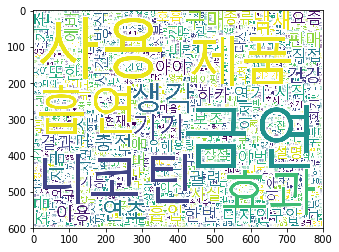

In [20]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(sort_result))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

w1 = w1.to_file(openFileName+'.png')